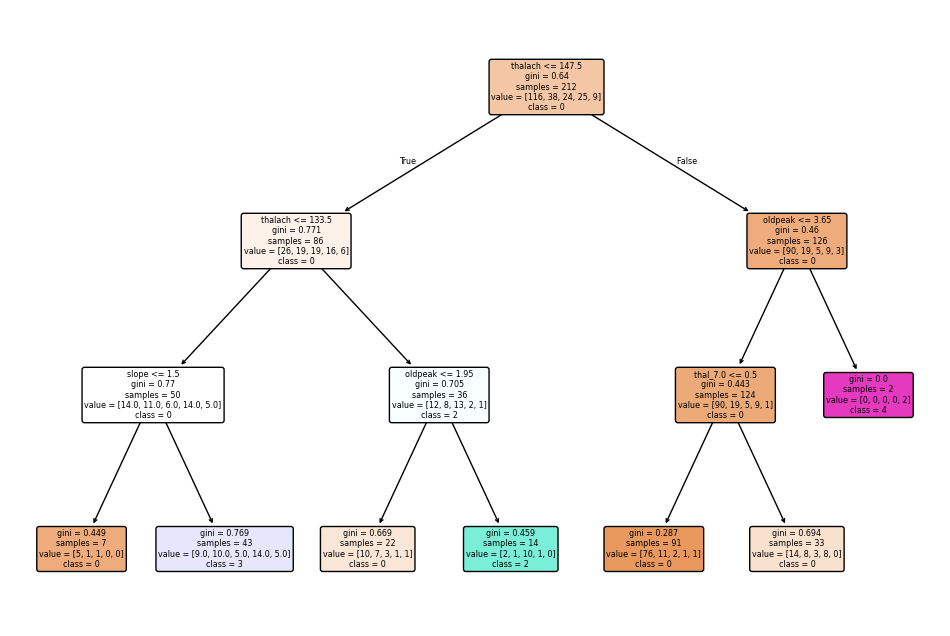

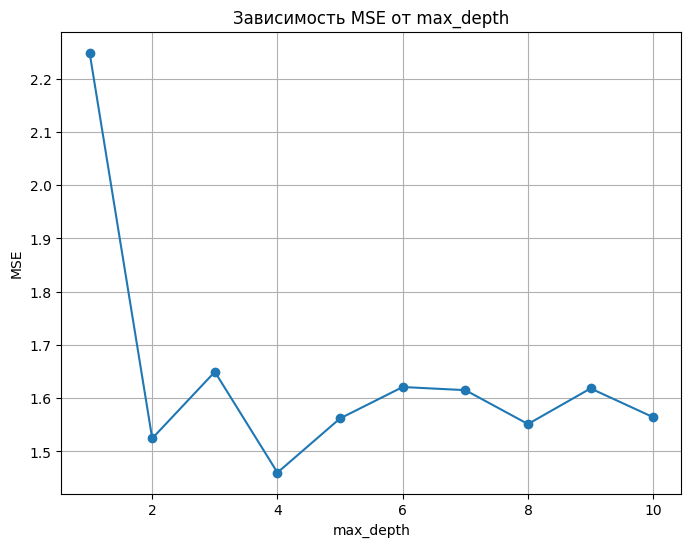

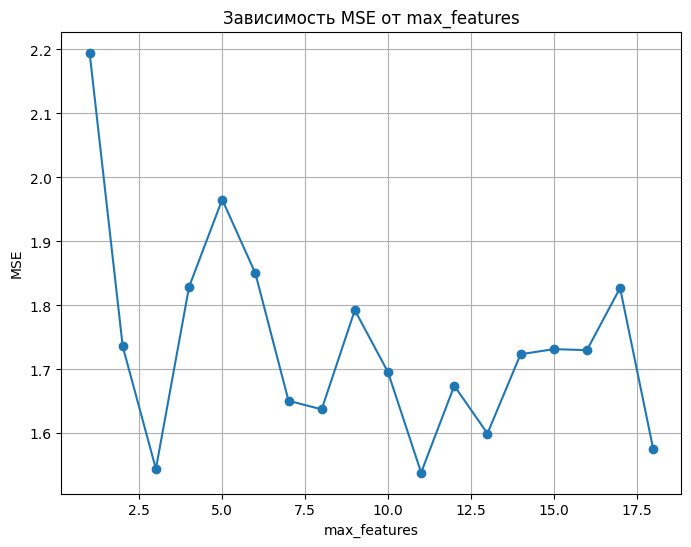

C:\Users\SanchoKusika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


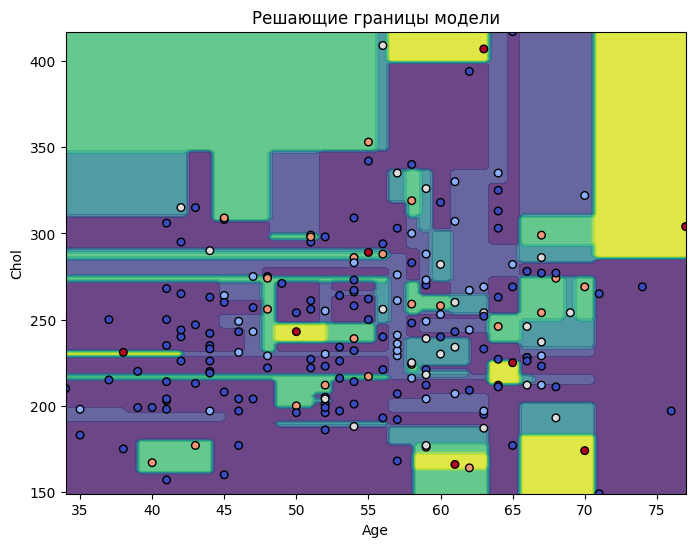

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Загрузка данных с разделителем запятой
data = pd.read_csv("processed.cleveland.data", header=None, delimiter=',')

# Задаём имена столбцов
data.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

# Преобразуем категориальные признаки в числовые с помощью get_dummies
data = pd.get_dummies(data, drop_first=True)

# Определяем признаки (X) и целевую переменную (y)
X = data.drop('num', axis=1)
y = data['num']

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2.1. Построение логического классификатора с max_depth и max_features
model = DecisionTreeClassifier(max_depth=3, max_features=5, random_state=42)
model.fit(X_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], rounded=True, max_depth=3)
plt.savefig("small_decision_tree.png")
plt.show()

# 2.2. Оценка cross-validation (MSE) для различных значений max_depth
depth_range = np.arange(1, 11)  # Проверяем глубины от 1 до 10
mse_depth = []
for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()  # MSE
    mse_depth.append(mse)

# График зависимости MSE от max_depth
plt.figure(figsize=(8, 6))
plt.plot(depth_range, mse_depth, marker='o')
plt.title('Зависимость MSE от max_depth')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

# 2.3. Оценка cross-validation (MSE) для различных значений max_features
features_range = np.arange(1, X.shape[1] + 1)  # Проверяем количество признаков от 1 до количества всех признаков
mse_features = []
for features in features_range:
    model = DecisionTreeClassifier(max_features=features, random_state=42)
    mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()  # MSE
    mse_features.append(mse)

# График зависимости MSE от max_features
plt.figure(figsize=(8, 6))
plt.plot(features_range, mse_features, marker='o')
plt.title('Зависимость MSE от max_features')
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

# 2.4. Вывод решающих границ полученной модели
# Для визуализации решающих границ используем только два признака для упрощения
X_vis = X_train[['age', 'chol']]  # Например, используем 'age' и 'chol'
model.fit(X_vis, y_train)

# Создаем сетку для визуализации
xx, yy = np.meshgrid(np.linspace(X_vis['age'].min(), X_vis['age'].max(), 100),
                     np.linspace(X_vis['chol'].min(), X_vis['chol'].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_vis['age'], X_vis['chol'], c=y_train, edgecolors='k', marker='o', s=30, cmap='coolwarm')
plt.title('Решающие границы модели')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.show()


**Выводы по графикам**

1. Дерево выделяет три основных признака, влияющих на вероятность сердечного заболевания: thalach, oldpeak и slope. Это означает, что эти показатели наиболее информативны для принятия решения о наличии или отсутствии заболевания.

2. График демонстрирует характерную зависимость средней квадратичной ошибки (MSE) от максимальной глубины деревьев (max_depth)

3. График демонстрирует нестабильную зависимость средней квадратичной ошибки (MSE) от максимального числа признаков (max_features)

4. Модель уловливает нелинейные зависимости между признаками